<a href="https://colab.research.google.com/github/artfix3r/Cifar10/blob/main/cifar10_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf

In [3]:
cifar10=tf.keras.datasets.cifar10

In [4]:
(x_train,y_train), (x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
x_train,y_train=x_train/255.0,y_train/255.0

In [6]:
y_train,y_test=y_train.flatten(),y_test.flatten()

In [7]:
K=len(set(y_train))

In [8]:
K

10

In [9]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [10]:
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
batch_size=32
data_generator=tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator=data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch=x_train.shape[0]//batch_size
r=model.fit(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epoch,epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.0992 - loss: 0.0222 - val_accuracy: 0.1000 - val_loss: 184986.3906
Epoch 2/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.0312 - loss: 0.0000e+00

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - accuracy: 0.0312 - loss: 0.0000e+00 - val_accuracy: 0.1000 - val_loss: 184855.2969
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 59s 26ms/step - accuracy: 0.0977 - loss: 0.0000e+00 - val_accuracy: 0.1000 - val_loss: 185084.4688
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.1250 - loss: 0.0000e+00 - val_accuracy: 0.1000 - val_loss: 185123.1406
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.1020 - loss: 0.0000e+00 - val_accuracy: 0.1000 - val_loss: 185749.0938
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.0938 - loss: 0.0000e+00 - val_accuracy: 0.1000 - val_loss: 185641.2031
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.1004 - loss: 0.0000e+00 - val_accuracy: 0.1000 - val_loss: 185228.0938
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.1562 - loss: 0.0000e+00 - val_accuracy: 0.1000 - val_loss: 185233.3750
Epoch 9/10
1562/1562 ━━━

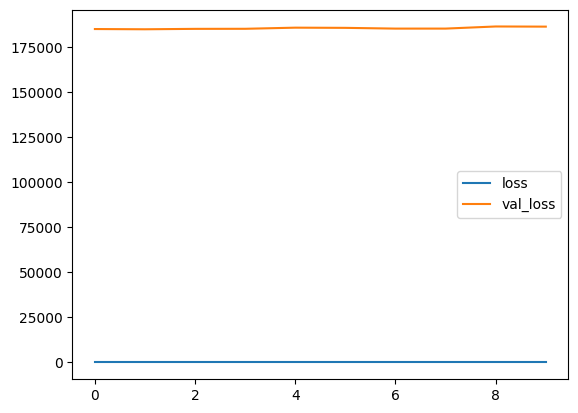

In [13]:

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

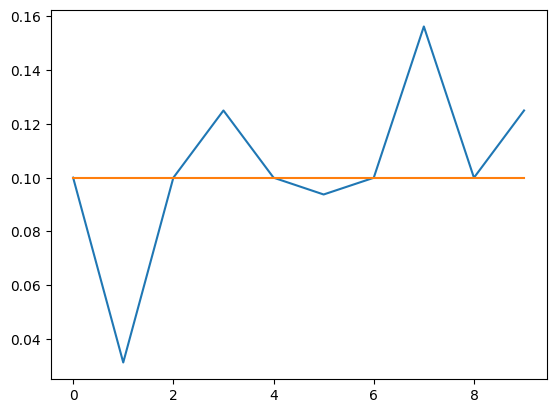

In [14]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
